In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Disable scientific notation for large numbers
pd.options.display.float_format = '{:.0f}'.format

# Setting display options for Pandas to show three decimal places for floating-point numbers
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Data Loading

In [ ]:
# import data
student_performance_df = pd.read_csv('/content/drive/MyDrive/student_performance_prediction.csv')

# Data Exploration

In [ ]:
student_performance_df.info() # Display information about the DataFrame, including data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 7 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Student ID                                   40000 non-null  object 
 1   Study Hours per Week                         38005 non-null  float64
 2   Attendance Rate                              38008 non-null  float64
 3   Previous Grades                              38006 non-null  float64
 4   Participation in Extracurricular Activities  38000 non-null  object 
 5   Parent Education Level                       38000 non-null  object 
 6   Passed                                       38000 non-null  object 
dtypes: float64(3), object(4)
memory usage: 2.1+ MB


In [ ]:
student_performance_df.head() # Display top 5 records

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,S00001,12.50,NaN,75.00,Yes,Master,Yes
1,S00002,9.30,95.30,60.60,No,High School,No
2,S00003,13.20,NaN,64.00,No,Associate,No
3,S00004,17.60,76.80,62.40,Yes,Bachelor,No
4,S00005,8.80,89.30,72.70,No,Master,No


In [ ]:
student_performance_df.describe() # Statistical info about dataset

,Study Hours per Week,Attendance Rate,Previous Grades
count,38005.00,38008.00,38006.00
mean,9.96,75.28,65.44
std,5.03,20.39,16.50
min,-12.30,-14.30,8.30
25%,6.60,61.60,55.10
50%,10.00,75.30,65.20
75%,13.40,88.80,75.20
max,32.40,150.20,200.00


# Data Preprocessing

In [ ]:
# Map 'yes' to 1 and 'no' to 0
student_performance_df['Passed'] = student_performance_df['Passed'].map({'Yes': 1, 'No': 0})
student_performance_df['Participation in Extracurricular Activities'] = student_performance_df['Participation in Extracurricular Activities'].map({'Yes': 1, 'No': 0})

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
encoder = OrdinalEncoder(categories=[['High School', 'Bachelor', 'Master','Associate','Doctorate',np.nan]])
student_performance_df['Parent Education Level'] = encoder.fit_transform(student_performance_df[['Parent Education Level']])

In [ ]:
student_performance_df.head()

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,S00001,12.50,NaN,75.00,1.00,2.00,1.00
1,S00002,9.30,95.30,60.60,0.00,0.00,0.00
2,S00003,13.20,NaN,64.00,0.00,3.00,0.00
3,S00004,17.60,76.80,62.40,1.00,1.00,0.00
4,S00005,8.80,89.30,72.70,0.00,2.00,0.00


In [ ]:
student_performance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 7 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Student ID                                   40000 non-null  object 
 1   Study Hours per Week                         38005 non-null  float64
 2   Attendance Rate                              38008 non-null  float64
 3   Previous Grades                              38006 non-null  float64
 4   Participation in Extracurricular Activities  38000 non-null  float64
 5   Parent Education Level                       38000 non-null  float64
 6   Passed                                       38000 non-null  float64
dtypes: float64(6), object(1)
memory usage: 2.1+ MB


# Data Cleaning

In [ ]:
# Replace null values in 'Passed','Participation in Extracurricular Activities' and 'Parent Education Level' column with 0
student_performance_df['Passed'].fillna(0, inplace=True)
student_performance_df['Participation in Extracurricular Activities'].fillna(0, inplace=True)
student_performance_df['Parent Education Level'].fillna(0, inplace=True)

/tmp/ipython-input-12-1938445274.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  student_performance_df['Passed'].fillna(0, inplace=True)
/tmp/ipython-input-12-1938445274.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [ ]:
student_performance_df.isna().sum()

,0
Student ID,0
Study Hours per Week,1995
Attendance Rate,1992
Previous Grades,1994
Participation in Extracurricular Activities,0
Parent Education Level,0
Passed,0


In [ ]:
# Convert 'Passed','Participation in Extracurricular Activities' and 'Parent Education Level' column from float to integer
student_performance_df['Passed'] = student_performance_df['Passed'].astype(int)
student_performance_df['Parent Education Level'] = student_performance_df['Parent Education Level'].astype(int)
student_performance_df['Participation in Extracurricular Activities'] = student_performance_df['Participation in Extracurricular Activities'].astype(int)

In [ ]:
student_performance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 7 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Student ID                                   40000 non-null  object 
 1   Study Hours per Week                         38005 non-null  float64
 2   Attendance Rate                              38008 non-null  float64
 3   Previous Grades                              38006 non-null  float64
 4   Participation in Extracurricular Activities  40000 non-null  int64  
 5   Parent Education Level                       40000 non-null  int64  
 6   Passed                                       40000 non-null  int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 2.1+ MB


In [ ]:
student_performance_df.head()

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,S00001,12.50,NaN,75.00,1,2,1
1,S00002,9.30,95.30,60.60,0,0,0
2,S00003,13.20,NaN,64.00,0,3,0
3,S00004,17.60,76.80,62.40,1,1,0
4,S00005,8.80,89.30,72.70,0,2,0


In [ ]:
# Remove rows with missing data in relevant columns 'Study Hours per Week' and 'Attendance Rate'
student_performance_df.dropna(subset=['Study Hours per Week','Attendance Rate'],inplace=True)

In [ ]:
student_performance_df.isna().sum() # Find sum of missing values

,0
Student ID,0
Study Hours per Week,0
Attendance Rate,0
Previous Grades,1793
Participation in Extracurricular Activities,0
Parent Education Level,0
Passed,0


In [ ]:
student_performance_df.fillna(0, inplace=True)  # Replace missing value with 0

In [ ]:
print(student_performance_df.isna().sum().sum())  # Find sum of missing values after replacing missing values

0


In [ ]:
print(student_performance_df.duplicated().sum())  # Find sum of duplicated values

0


Since, sum of duplicated values is zero, so there is no need to drop duplicates.

# Data Exploration

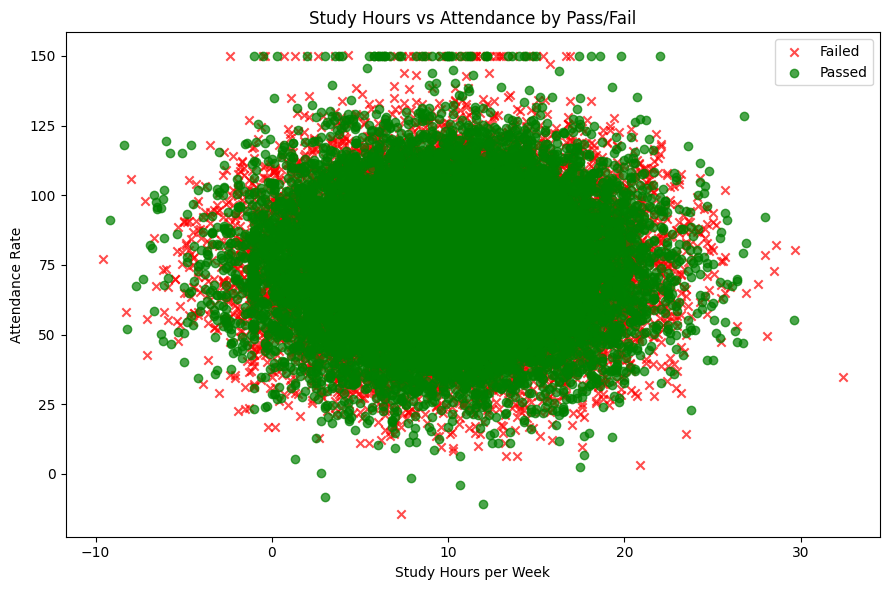

In [ ]:
# Plot the relationship between Study Hours, Attendance, and Pass to visualize trends.
plt.figure(figsize=(9, 6))
colors = student_performance_df['Passed'].map({1: 'green', 0: 'red'})
markers = student_performance_df['Passed'].map({1: 'o', 0: 'x'})

for p in [0, 1]:
    plt.scatter(
        student_performance_df[student_performance_df['Passed'] == p]['Study Hours per Week'],
        student_performance_df[student_performance_df['Passed'] == p]['Attendance Rate'],
        alpha=0.7,
        c='green' if p == 1 else 'red',
        label='Passed' if p == 1 else 'Failed',
        marker='o' if p == 1 else 'x'
    )

plt.xlabel('Study Hours per Week')
plt.ylabel('Attendance Rate')
plt.title('Study Hours vs Attendance by Pass/Fail')
plt.legend()
plt.tight_layout()
plt.show()

# Model training and evaluation

In [ ]:
# Select features and target, handle missing values and target conversions
X = student_performance_df[['Study Hours per Week', 'Attendance Rate']]
y = student_performance_df['Passed']

# Split into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Model predictions
y_pred = model.predict(X_test)

# Print Evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[3803    1]
 [3419    0]]

Accuracy Score: 0.5265125294199087

Classification Report:
              precision    recall  f1-score   support

           0       0.53      1.00      0.69      3804
           1       0.00      0.00      0.00      3419

    accuracy                           0.53      7223
   macro avg       0.26      0.50      0.34      7223
weighted avg       0.28      0.53      0.36      7223



# Key predictors of student performance

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define features and target
exclude_cols = ['Student ID', 'Passed']  # Exclude ID and target from features
features = [col for col in student_performance_df.columns if col not in exclude_cols]


X = student_performance_df[features]
y = student_performance_df['Passed']

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Feature importance
importances = model.feature_importances_
feature_ranking = sorted(zip(features, importances), key=lambda x: x[1], reverse=True)

print("Key Predictors of Student Performance:")
for feature, importance in feature_ranking:
    print(f"{feature}: {importance:.3f}")

Key Predictors of Student Performance:
Attendance Rate: 0.333
Previous Grades: 0.315
Study Hours per Week: 0.287
Parent Education Level: 0.046
Participation in Extracurricular Activities: 0.020


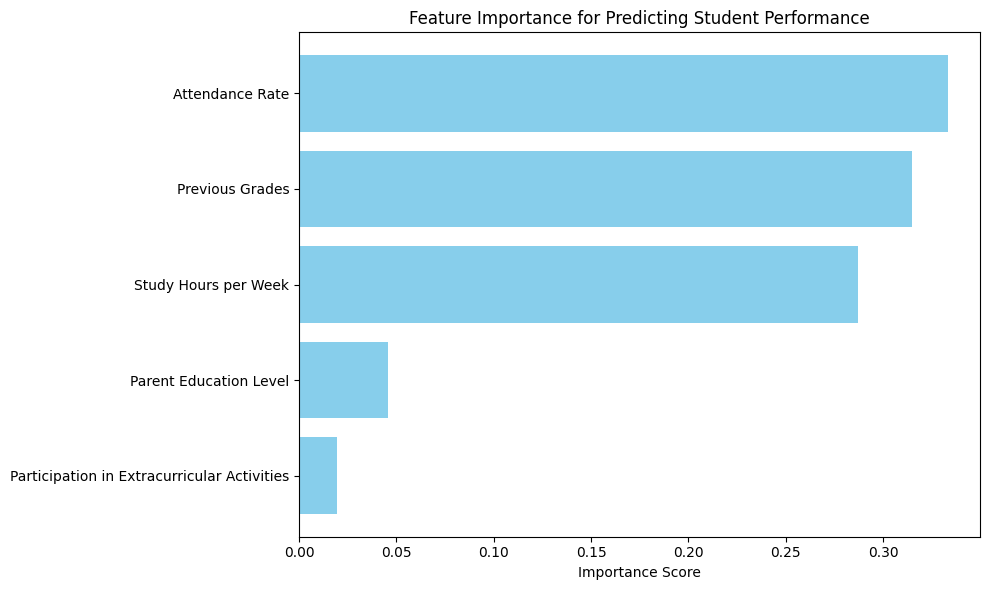

In [ ]:
# Create plot for key predictors of student performance
feature_names = X.columns

# Sort features by importance
indices = importances.argsort()[::-1]
sorted_features = feature_names[indices]
sorted_importances = importances[indices]

# Plot
plt.figure(figsize=(10,6))
plt.barh(sorted_features, sorted_importances, color='skyblue')
plt.xlabel("Importance Score")
plt.title("Feature Importance for Predicting Student Performance")
plt.gca().invert_yaxis()  # Highest at top
plt.tight_layout()
plt.show()